In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [13]:
import os
print(os.getcwd())

c:\Users\USER\Desktop\DeepLearning\data_augmentation


In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [15]:
import pathlib
data_dir=pathlib.Path('./datasets/flower_photos/flower_photos')

data_dir

WindowsPath('datasets/flower_photos/flower_photos')

In [16]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [17]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [18]:
roses=list(data_dir.glob('roses/*'))

In [19]:
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

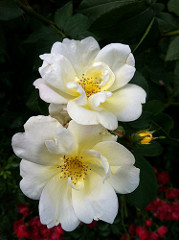

In [20]:
PIL.Image.open(str(roses[0]))

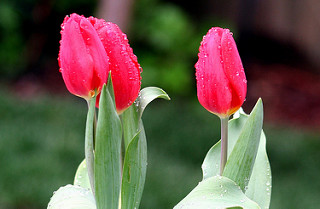

In [21]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

Read flowers images from disk into numpy array using opencv

In [ ]:
flowers_images_dict={
    'roses': list(data_dir.glob('roses/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    'daisy': list(data_dir.glob('daisy/*')),
}

In [23]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [24]:
flowers_images_dict['roses'][:5]


[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [25]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [26]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [27]:
img.shape

(240, 179, 3)

In [28]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [29]:
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [30]:
X=np.array(X)
y=np.array(y)

## Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

## Preprocessing

In [32]:
X_train_scaled=X_train/255.0
X_test_scaled=X_test/255.0

## Build CNN and train it

In [34]:
num_classes=5
model=Sequential([
    layers.Conv2D(16,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'), 
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.2442 - loss: 2.1213
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.5352 - loss: 1.1194
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.6614 - loss: 0.8973
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.7569 - loss: 0.6530
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8426 - loss: 0.4448
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9197 - loss: 0.2502
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9617 - loss: 0.1402
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9731 - loss: 0.0917
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9884 - loss: 0.0523
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9840 - loss: 0.0531


In [ ]:
model.evaluate(X_test_scaled,y_test) 

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5911 - loss: 2.3550


[2.245344877243042, 0.601307213306427]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [36]:
predictions = model.predict(X_test_scaled)
predictions


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[ -3.1697154 ,   5.889393  ,   7.2303724 ,   0.05204137,
         -1.2953974 ],
       [ 12.904989  ,  -0.6987312 , -13.110815  ,  -1.2682073 ,
          7.2178645 ],
       [  4.7191043 ,   4.254842  ,   3.4081385 ,  14.674731  ,
          3.058257  ],
       ...,
       [ 13.680651  ,  -8.388984  ,  -7.233682  ,  11.885161  ,
         16.268099  ],
       [  3.1524327 ,   5.445204  ,   2.2663975 ,  -0.07468347,
          1.8490996 ],
       [ 22.270754  ,  -2.4932938 , -20.46588   ,   3.7930946 ,
         14.808139  ]], dtype=float32)

In [37]:
score=tf.nn.softmax(predictions[0])

In [38]:
np.argmax(score)

np.int64(2)

In [39]:
y_test[0]

np.int64(2)

#### Improve test accuracy, using Data Augmentation

In [43]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

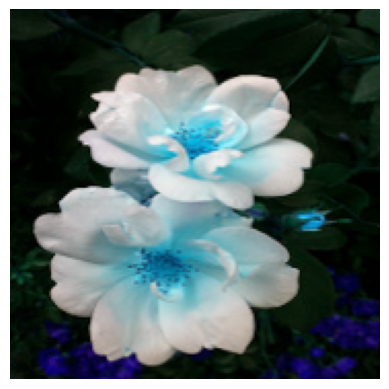

In [44]:
plt.axis("off")
plt.imshow(X[0])

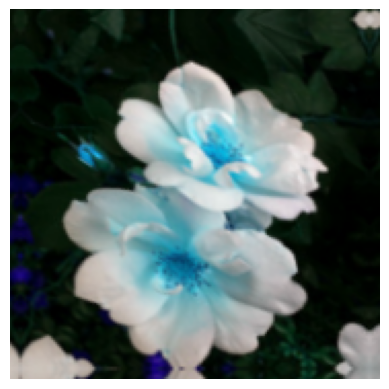

In [45]:
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

## Train model using Data Augmentation and dropout layer

In [47]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)    

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.3920 - loss: 1.4749
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.5415 - loss: 1.1258
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.6077 - loss: 0.9857
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.6491 - loss: 0.9179
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.6641 - loss: 0.8737
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.6974 - loss: 0.7984
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.7157 - loss: 0.7293
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7015 - loss: 0.7559
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.7047 - loss: 0.7448
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.7260 - loss: 0.6722


In [48]:
model.evaluate(X_test_scaled,y_test)    

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6947 - loss: 0.8567


[0.7924896478652954, 0.7069717049598694]